# MODELO 3 - Avaliação dos Modelos de marchine learning.



---

---

---


In [1]:
%matplotlib inline

In [2]:
# Importa as bibliotecas
import pandas
import matplotlib.pyplot as plt
import numpy 
#from pandas.tools.plotting import scatter_matrix
from  pandas.plotting  import scatter_matrix
import seaborn as sb
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import Normalizer
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score , roc_curve, auc ,accuracy_score,recall_score, precision_score,f1_score
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


#  1) Carregando os dados de treino e teste para avalição do modelo

In [3]:
try:
    import cPickle as pickle
except ModuleNotFoundError:
    import pickle

In [4]:
output = ".\\baseDados\\voice_treino_test.pk"

In [5]:
dic_base_treino_file = pickle.load(open( output, "rb" ))

In [6]:
y_train = dic_base_treino_file['y_train'] 
y_test = dic_base_treino_file['y_test'] 
X_train = dic_base_treino_file['X_train_norm']  
X_test = dic_base_treino_file['X_test_norm']
feature_cols =  dic_base_treino_file['feature_cols']

print(feature_cols)


Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'int'],
      dtype='object')


In [7]:
dfContador =pandas.DataFrame(list(y_train), columns = ['genero'])
contagem = dfContador.groupby('genero').size()
print(contagem)

genero
0    1108
1    1108
dtype: int64


In [8]:
dfContador =pandas.DataFrame(list(y_test), columns = ['genero'])
contagem = dfContador.groupby('genero').size()
print(contagem)

genero
0    476
1    476
dtype: int64


---
---
---
---

---

# 2) carregando o modelo Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=1,n_estimators=100,min_impurity_decrease=0.05)



## Treinamento e teste do modelo:  Random Forest.

In [10]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.05, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [11]:
rf_pred=rf_model.predict(X_test)

---

##  Modelo de avaliação de métricas.

### Precisão Geral (Accuracy)

In [12]:
#get accuracy
rf_accuracy_testdata = metrics.accuracy_score(y_test, rf_pred)


In [13]:
#print accuracy
print ("Accuracy: {0:.4f}".format(rf_accuracy_testdata))
RF_Accuracy = metrics.accuracy_score(y_test, rf_pred)
print(RF_Accuracy)

Accuracy: 0.8918
0.8918067226890757


### Matriz de confusão: Random Forest

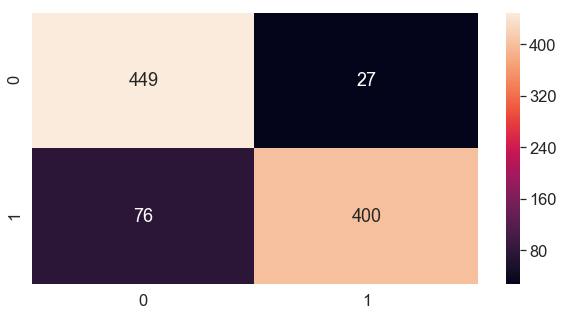

In [14]:
import plot as plot
cm=confusion_matrix(y_test,rf_pred)
#Plot the confusion matrix
plt.rcParams['figure.figsize'] = (10,5)
sb.set(font_scale=1.5)
sb.heatmap(cm, annot=True, fmt='g')
plt.show()



### Metricas Report: Random Forest

In [15]:
print ("{0}".format(metrics.classification_report(y_test, rf_pred, labels=[0, 1])))


              precision    recall  f1-score   support

           0       0.86      0.94      0.90       476
           1       0.94      0.84      0.89       476

    accuracy                           0.89       952
   macro avg       0.90      0.89      0.89       952
weighted avg       0.90      0.89      0.89       952



In [16]:
cm=confusion_matrix(y_test,rf_pred)
confusion_matrix_lda = pandas.DataFrame(cm, index = ['Negativos','Positivos'], columns = ['Previsão dos negativos','Previsão dos positivos'] )
confusion_matrix_lda['Total'] = 1
confusion_matrix_lda['Total'][0] = cm[0][0] + cm[0][1]
confusion_matrix_lda['Total'][1] = cm[1][0] + cm[1][1]

In [17]:
confusion_matrix_lda

,Previsão dos negativos,Previsão dos positivos,Total
Negativos,449,27,476
Positivos,76,400,476


In [18]:
print(confusion_matrix_lda)

           Previsão dos negativos  Previsão dos positivos  Total
Negativos                     449                      27    476
Positivos                      76                     400    476


In [19]:
TP = confusion_matrix_lda['Previsão dos positivos'][1]
dfTP = pandas.DataFrame(TP, index = ['Positivos verdadeiros'], columns = ['Quantidade acertos'] )

In [20]:
TN = confusion_matrix_lda['Previsão dos negativos'][0]
dfTN = pandas.DataFrame(TN, index = ['Verdadeiro Negativo'], columns = ['Quantidade acertos'] )

In [21]:
FP = confusion_matrix_lda['Previsão dos positivos'][0]
dfFP = pandas.DataFrame(FP, index = ['Falso Positivo'], columns = ['Quantidade acertos'] )

In [22]:
FN = confusion_matrix_lda['Previsão dos negativos'][1]
dfFN = pandas.DataFrame(FN, index = ['Negativos Falsos'], columns = ['Quantidade acertos'] )

In [23]:
rfSpecificity = TN / float(TN + FP)
dfSpecificity = pandas.DataFrame(rfSpecificity, index = ['Specificity'], columns = ['resultado'] )

In [24]:
dfSpecificity

,resultado
Specificity,0.943277


In [25]:
rfRecall= recall_score(y_test, rf_pred)
print(rfRecall)

0.8403361344537815


In [26]:
print(TP / float(TP + FP))
print(precision_score(y_test, rf_pred))
rfPrecision = precision_score(y_test, rf_pred)

0.936768149882904
0.936768149882904


In [27]:
rfF1Score = 2 * rfPrecision *  rfRecall /  float(rfPrecision + rfRecall)
print(rfF1Score)


0.8859357696566998


---
###  Curva ROC: Random Forest
Uma curva ROC é uma forma comumente usada para visualizar o desempenho de um classificador binário, significando um classificador com duas classes de saída possíveis. A curva plota a Taxa Positiva Real (Recall) contra a Taxa Falsa Positiva (também interpretada como Especificidade 1).

In [28]:
rf_pred_prob = rf_model.predict_proba(X_test)[:, 1]

In [29]:
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, rf_pred_prob)

In [30]:
def plot_roc_curve(fpr, tpr,nome='ROC'):
    plt.plot(fpr, tpr, color='red', label=nome)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Taxa de falsos positivos')
    plt.ylabel('Taxa de verdadeiros positivos')
    plt.title('Curva ROC:Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

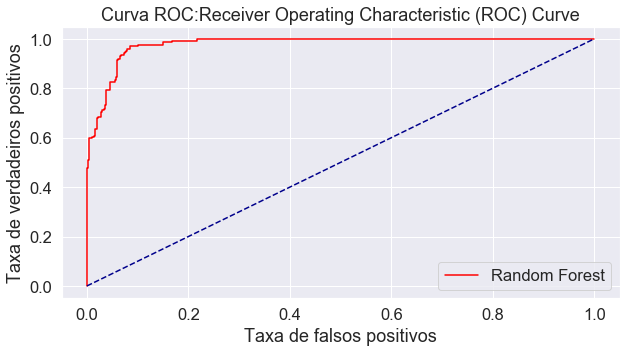

In [31]:
plot_roc_curve(rf_fpr, rf_tpr,'Random Forest')

---

###  AUC (área sob a curva) da Curva ROC : Random Forest
AUC ou Area Under the Curve é a porcentagem do gráfico do ROC que está abaixo da curva. AUC é útil como um único número de resumo do desempenho do classificador.

In [32]:
print(roc_auc_score(y_test, rf_pred_prob))
RF_Auc=roc_auc_score(y_test, rf_pred_prob)

0.9785767248075701


In [33]:
dfAuc = pandas.DataFrame(RF_Auc, index = ['AUC'], columns = ['resultado'] )
dfAuc

,resultado
AUC,0.978577


In [34]:
print(dfAuc)

     resultado
AUC   0.978577


---
---
---
---
---

# Carregando o modelo  Máquina de vetores de suporte SVM

In [35]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=45, random_state=2 ,probability=True,coef0=0.3)

#kernel='linear'

### Treinamento e teste do modelo: SVM.

In [36]:

svm_model.fit(X_train, y_train)


SVC(C=45, cache_size=200, class_weight=None, coef0=0.3,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=2,
    shrinking=True, tol=0.001, verbose=False)

In [37]:
svm_pred = svm_model.predict(X_test)


---

##  Modelo de avaliação de métricas.

### Precisão Geral (Accuracy): SVM

In [38]:
print(f"accuracy score: {accuracy_score(y_test, svm_pred):.4f}\n")
svm_accuracy_testdata = accuracy_score(y_test, svm_pred)

accuracy score: 0.9874



### Matriz de confusão: SVM

In [39]:
cm=confusion_matrix(y_test, svm_model.predict(X_test))

In [40]:
confusion_matrix_lda = pandas.DataFrame(cm, index = ['Negativos','Positivos'], columns = ['Previsão dos negativos','Previsão dos positivos'] )
confusion_matrix_lda['Total'] = 1
confusion_matrix_lda['Total'][0] = cm[0][0] + cm[0][1]
confusion_matrix_lda['Total'][1] = cm[1][0] + cm[1][1]

In [41]:
confusion_matrix_lda

,Previsão dos negativos,Previsão dos positivos,Total
Negativos,475,1,476
Positivos,11,465,476


In [42]:
TP = confusion_matrix_lda['Previsão dos positivos'][1]
dfTP = pandas.DataFrame(TP, index = ['Positivos verdadeiros'], columns = ['Quantidade acertos'] )
TP

465

In [43]:
TN = confusion_matrix_lda['Previsão dos negativos'][0]
dfTN = pandas.DataFrame(TN, index = ['Verdadeiro Negativo'], columns = ['Quantidade acertos'] )
TN

475

In [44]:
FP = confusion_matrix_lda['Previsão dos positivos'][0]
dfFP = pandas.DataFrame(FP, index = ['Falso Positivo'], columns = ['Quantidade acertos'] )
FP

1

In [45]:
FN = confusion_matrix_lda['Previsão dos negativos'][1]
dfFN = pandas.DataFrame(FN, index = ['Negativos Falsos'], columns = ['Quantidade acertos'] )
FN

11

In [46]:
print(f"accuracy score: {accuracy_score(y_test, svm_pred):.4f}\n")
svmAccuracy = accuracy_score(y_test, svm_pred)

accuracy score: 0.9874



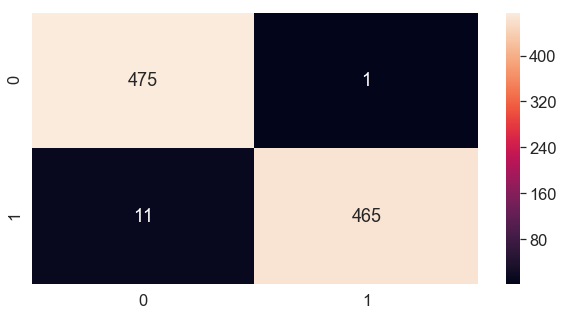

In [47]:
import plot as plot
cm=confusion_matrix(y_test, svm_model.predict(X_test))
#Plot the confusion matrix
plt.rcParams['figure.figsize'] = (10,5)
sb.set(font_scale=1.5)
sb.heatmap(cm, annot=True, fmt='g')
plt.show()

### Metricas Report: svm

In [48]:
print(f"Classification Report: \n \tPrecision: {precision_score(y_test, svm_pred)}\n\tRecall Score: {recall_score(y_test,svm_pred)}\n\tF1 score: {f1_score(y_test, svm_pred)}\n")


Classification Report: 
 	Precision: 0.9978540772532188
	Recall Score: 0.976890756302521
	F1 score: 0.9872611464968152



In [49]:
svmPrecision = precision_score(y_test, svm_pred)

In [50]:
svmRecall = recall_score(y_test, svm_pred)

In [51]:
svmF1_score = f1_score(y_test, svm_pred)

In [52]:
svmSpecificity = TN / float(TN + FP)
dfSpecificity = pandas.DataFrame(svmSpecificity, index = ['Specificity'], columns = ['resultado'] )
svmSpecificity

0.9978991596638656

---
###  Curva ROC: SVM


In [53]:
svm_pred_prob = svm_model.predict_proba(X_test)[:, 1]


In [54]:
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, svm_pred_prob)

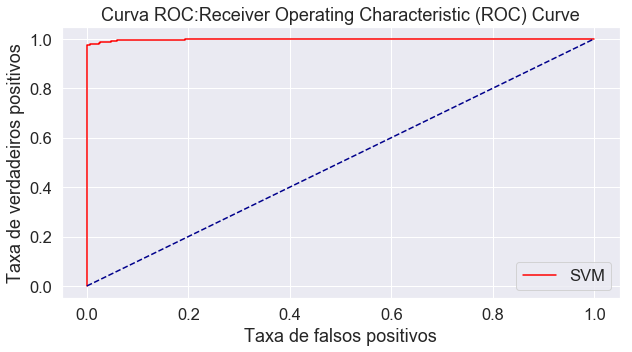

In [55]:
plot_roc_curve(svm_fpr, svm_tpr,'SVM')

---

###  AUC (área sob a curva) da Curva ROC : SVM
AUC ou Area Under the Curve é a porcentagem do gráfico do ROC que está abaixo da curva. AUC é útil como um único número de resumo do desempenho do classificador.

In [56]:
print(roc_auc_score(y_test, svm_pred_prob))
SVM_Auc=roc_auc_score(y_test, svm_pred_prob)

0.9981772120612952


---
---
---
---
---

# Carregando o modelo  Máquina de Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()



### Treinamento e teste do modelo: NB.

In [58]:
nb_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:
nb_pred = nb_model.predict(X_test)

##  Modelo de avaliação de métricas. NB.

### Precisão Geral (Accuracy): NB.

In [60]:
#get accuracy
print(f"accuracy score: {accuracy_score(y_test, nb_pred):.4f}\n")
nb_accuracy_testdata = accuracy_score(y_test, nb_pred)

accuracy score: 0.8761



### Matriz de confusão: NB.

In [61]:
cm=confusion_matrix(y_test, nb_model.predict(X_test))
confusion_matrix_lda = pandas.DataFrame(cm, index = ['Negativos','Positivos'], columns = ['Previsão dos negativos','Previsão dos positivos'] )
confusion_matrix_lda['Total'] = 1
confusion_matrix_lda['Total'][0] = cm[0][0] + cm[0][1]
confusion_matrix_lda['Total'][1] = cm[1][0] + cm[1][1]
confusion_matrix_lda

,Previsão dos negativos,Previsão dos positivos,Total
Negativos,422,54,476
Positivos,64,412,476


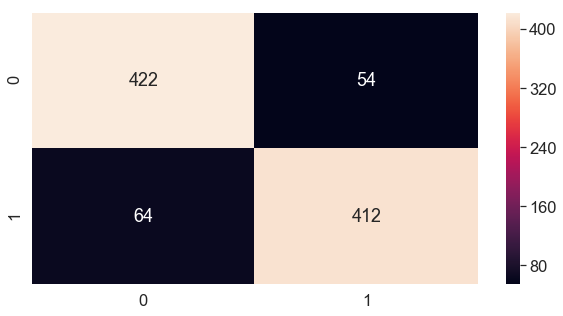

In [62]:
import plot as plot
cm=confusion_matrix(y_test, nb_model.predict(X_test))
#Plot the confusion matrix
plt.rcParams['figure.figsize'] = (10,5)
sb.set(font_scale=1.5)
sb.heatmap(cm, annot=True, fmt='g')
plt.show()

### Metricas Report: NB.

In [63]:
print(f"Classification Report: \n \tPrecision: {precision_score(y_test, nb_pred)}\n\tRecall Score: {recall_score(y_test,nb_pred)}\n\tF1 score: {f1_score(y_test, nb_pred)}\n")


Classification Report: 
 	Precision: 0.8841201716738197
	Recall Score: 0.865546218487395
	F1 score: 0.8747346072186836



In [64]:
TP = confusion_matrix_lda['Previsão dos positivos'][1]
dfTP = pandas.DataFrame(TP, index = ['Positivos verdadeiros'], columns = ['Quantidade acertos'] )
TP

412

In [65]:
TN = confusion_matrix_lda['Previsão dos negativos'][0]
dfTN = pandas.DataFrame(TN, index = ['Verdadeiro Negativo'], columns = ['Quantidade acertos'] )
TN

422

In [66]:
FP = confusion_matrix_lda['Previsão dos positivos'][0]
dfFP = pandas.DataFrame(FP, index = ['Falso Positivo'], columns = ['Quantidade acertos'] )
FP

54

In [67]:
FN = confusion_matrix_lda['Previsão dos negativos'][1]
dfFN = pandas.DataFrame(FN, index = ['Negativos Falsos'], columns = ['Quantidade acertos'] )
FN

64

In [68]:
print(f"accuracy score: {accuracy_score(y_test, nb_pred):.4f}\n")
nbAccuracy = accuracy_score(y_test, nb_pred)

accuracy score: 0.8761



In [69]:
nbPrecision = precision_score(y_test, nb_pred)

In [70]:
nbRecall = recall_score(y_test, nb_pred)

In [71]:
nbF1_score = f1_score(y_test, nb_pred)

In [72]:
nbSpecificity = TN / float(TN + FP)
dfSpecificity = pandas.DataFrame(nbSpecificity, index = ['Specificity'], columns = ['resultado'] )
nbSpecificity

0.8865546218487395

---
###  Curva ROC: NB.

In [73]:
nb_pred_prob = nb_model.predict_proba(X_test)[:, 1]

In [74]:
nb_fpr, nb_tpr, thresholds = roc_curve(y_test, nb_pred_prob)

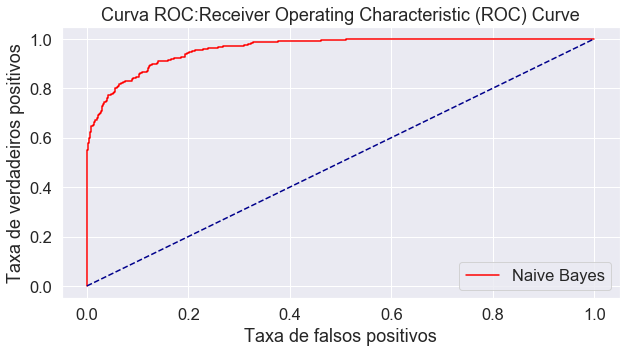

In [75]:
plot_roc_curve(nb_fpr, nb_tpr,'Naive Bayes')

###  AUC (área sob a curva) da Curva ROC : NB.

In [76]:
print(roc_auc_score(y_test, nb_pred_prob))
NB_Auc=roc_auc_score(y_test, nb_pred_prob)

0.9599516277099075


---
---
---
---
---
---
---

# Comparativo entre os modelos

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns
#sns.set('talk', 'whitegrid', 'dark', font_scale=1.5, font='Ricty',   rc={"lines.linewidth": 2, 'grid.linestyle': '--'})



### Carregar  o modelo de Árvore Decisão


In [78]:
filename = '.\\baseDados\\cart.jss'
infile = open(filename,'rb')
cart_dict = pickle.load(infile)
infile.close()
CART_auc= cart_dict['Auc']
CART_pred_prob= cart_dict['y_pred_prob']

In [79]:
#print(cart_dict)

In [80]:
#print(cart_dict)
cart_fpr, cart_tpr, thresholds = roc_curve(y_test, CART_pred_prob)

### Carregar  o modelo de Regressão logística

In [81]:
filenamerl = '.\\baseDados\\regressaologitica.jss'
infile = open(filenamerl,'rb')
rlog_dict = pickle.load(infile)
infile.close()
#print(rlog_dict)
rlog_auc= rlog_dict['Auc']
rlog_pred_prob= rlog_dict['y_pred_prob']

In [82]:
rlog_fpr, rlog_tpr, thresholds = roc_curve(y_test, rlog_pred_prob)

## Mostra o gráfico comparativo

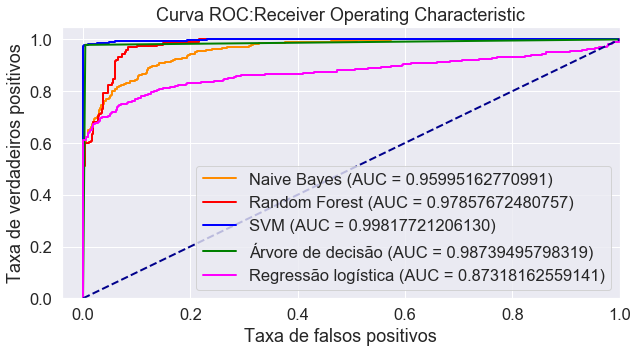

In [83]:
lw = 2
plt.figure()
plt.rcParams['figure.figsize'] = (12,6)



plt.plot(nb_fpr, nb_tpr, color='darkorange',  lw=lw, label='Naive Bayes (AUC = %0.14f)' % NB_Auc)
plt.plot(rf_fpr, rf_tpr , color='red',  lw=lw, label='Random Forest (AUC = %0.14f)' % RF_Auc)
plt.plot(svm_fpr, svm_tpr , color='blue',  lw=lw, label='SVM (AUC = %0.14f)' % SVM_Auc)
plt.plot(cart_fpr, cart_tpr , color='green',  lw=lw, label='Árvore de decisão (AUC = %0.14f)' % CART_auc)
plt.plot(rlog_fpr, rlog_tpr , color='magenta',  lw=lw, label='Regressão logística (AUC = %0.14f)' % rlog_auc)


#------------ linha central-----------------------------
plt.plot([0, 1], [0, 1], color='darkblue',lw=lw, linestyle='--')
plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Taxa de verdadeiros positivos')
plt.title('Curva ROC:Receiver Operating Characteristic')


sb.set(font_scale=1.5)
plt.legend()
plt.xlim([-0.04, 1.0])
plt.ylim([0.0, 1.05])


plt.show()
plt.savefig('roc_auc.png')
plt.close()

In [84]:
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

<Figure size 864x432 with 0 Axes>

# Comparando as métricas dos modelos Acurácia, Precisão e AUC.

In [85]:
#print(cart_dict)



In [86]:
dfresultado=pd.DataFrame.from_dict(dict([('Regressão Logística',[rlog_dict['Accuracy'], 
                                                     rlog_dict['Precision'], 
                                                     rlog_dict['Specificity'],
                                                     rlog_dict['F1Score'],
                                                     rlog_dict['Recall'],
                                                     rlog_dict['Auc']]),
                            ('Arvore de decisão',[cart_dict['Accuracy'], 
                                                     cart_dict['Precision'], 
                                                     cart_dict['Specificity'],
                                                     cart_dict['F1Score'],
                                                     cart_dict['Recall'],
                                                     cart_dict['Auc']]),
                            ('Random Forest', [RF_Accuracy, rfPrecision, rfSpecificity,rfF1Score,rfRecall,RF_Auc]),
                            ('SVM', [svmAccuracy, svmPrecision, svmSpecificity,svmF1_score,svmRecall,SVM_Auc]),
                            ('Naive Bayes', [nb_accuracy_testdata, nbPrecision, nbSpecificity,nbF1_score,nbRecall,NB_Auc])]),                   
                            orient='index', columns=['Accuracy', 'Precision', 'Specificity', 'F1Score', 'Recall','AUC'])

In [87]:
dfresultado

,Accuracy,Precision,Specificity,F1Score,Recall,AUC
Regressão Logística,0.830882,0.846154,0.852941,0.827068,0.808824,0.873182
Arvore de decisão,0.987395,0.995726,0.995798,0.987288,0.978992,0.987395
Random Forest,0.891807,0.936768,0.943277,0.885936,0.840336,0.978577
SVM,0.987395,0.997854,0.997899,0.987261,0.976891,0.998177
Naive Bayes,0.876050,0.884120,0.886555,0.874735,0.865546,0.959952


In [88]:
dfresultado.describe()

,Accuracy,Precision,Specificity,F1Score,Recall,AUC
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.914706,0.932125,0.935294,0.912457,0.894118,0.959456
std,0.070022,0.067236,0.064810,0.071786,0.079118,0.050222
min,0.830882,0.846154,0.852941,0.827068,0.808824,0.873182
25%,0.876050,0.884120,0.886555,0.874735,0.840336,0.959952
50%,0.891807,0.936768,0.943277,0.885936,0.865546,0.978577
75%,0.987395,0.995726,0.995798,0.987261,0.976891,0.987395
max,0.987395,0.997854,0.997899,0.987288,0.978992,0.998177


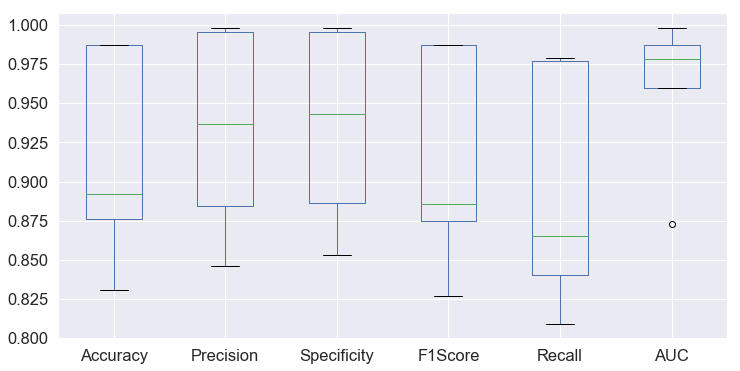

In [89]:
boxplot = dfresultado.boxplot()

In [90]:
Amplitudedic = {}
Varianciadic = {}
CoeficienteVardic = {}
juntar = {}
IntervaloInterquartildic = {}
colunas=['Accuracy', 'Precision', 'Specificity', 'F1Score', 'Recall','AUC']
for x in colunas:
    juntar[x] = dfresultado[x].std()/1
    Amplitudedic[x]=dfresultado[x].max() - dfresultado[x].min()
    Varianciadic[x] = dfresultado[x].var()
    CoeficienteVardic[x] = (dfresultado[x].std()/dfresultado[x].mean()) *  100
    IntervaloInterquartildic[x] = dfresultado[x].quantile(q=0.75) - dfresultado[x].quantile(q=0.25)

In [91]:
dfAmplitude = pandas.DataFrame.from_dict(Amplitudedic, orient="index").reset_index()
dfAmplitude.columns = ["quantitativas","Amplitude"]
dfAmplitude.head()



,quantitativas,Amplitude
0,Accuracy,0.156513
1,Precision,0.151700
2,Specificity,0.144958
3,F1Score,0.160220
4,Recall,0.170168


In [92]:

dfstd = pandas.DataFrame.from_dict(juntar, orient="index").reset_index()
dfstd.columns = ["quantitativas","std"]
dfstd.head()

,quantitativas,std
0,Accuracy,0.070022
1,Precision,0.067236
2,Specificity,0.064810
3,F1Score,0.071786
4,Recall,0.079118


In [93]:
dfVariancia = pandas.DataFrame.from_dict(Varianciadic, orient="index").reset_index()
dfVariancia.columns = ["quantitativas","Variancia"]
dfVariancia.head()

,quantitativas,Variancia
0,Accuracy,0.004903
1,Precision,0.004521
2,Specificity,0.004200
3,F1Score,0.005153
4,Recall,0.006260


In [94]:
dfCoeficiente = pandas.DataFrame.from_dict(CoeficienteVardic, orient="index").reset_index()
dfCoeficiente.columns = ["quantitativas","Coef_Var_%"]
dfCoeficiente.head()

,quantitativas,Coef_Var_%
0,Accuracy,7.655154
1,Precision,7.213160
2,Specificity,6.929388
3,F1Score,7.867351
4,Recall,8.848760


In [95]:
IntervaloInterquartil = pandas.DataFrame.from_dict(IntervaloInterquartildic, orient="index").reset_index()
IntervaloInterquartil.columns = ["quantitativas","Intervalo_Interquartil"]
IntervaloInterquartil.head()

,quantitativas,Intervalo_Interquartil
0,Accuracy,0.111345
1,Precision,0.111606
2,Specificity,0.109244
3,F1Score,0.112527
4,Recall,0.136555


In [96]:
dfresultado_frame=pandas.merge(dfAmplitude,dfVariancia,how='right',on='quantitativas')
dfresultado_frame=pandas.merge(dfresultado_frame,dfCoeficiente,how='right',on='quantitativas')
dfresultado_frame=pandas.merge(dfresultado_frame,IntervaloInterquartil,how='right',on='quantitativas')
dfresultado_frame=pandas.merge(dfresultado_frame,dfstd,how='right',on='quantitativas')
dfresultado_frame

,quantitativas,Amplitude,Variancia,Coef_Var_%,Intervalo_Interquartil,std
0,Accuracy,0.156513,0.004903,7.655154,0.111345,0.070022
1,Precision,0.151700,0.004521,7.213160,0.111606,0.067236
2,Specificity,0.144958,0.004200,6.929388,0.109244,0.064810
3,F1Score,0.160220,0.005153,7.867351,0.112527,0.071786
4,Recall,0.170168,0.006260,8.848760,0.136555,0.079118
5,AUC,0.124996,0.002522,5.234431,0.027443,0.050222


---
---
---
---
---
---

# Fim da avaliação do modelo.